In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import pathlib
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import mapclassify as mc
import numpy as np
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
%matplotlib inline

In [2]:
zip = gpd.read_file('../data/zipcodes.geojson')

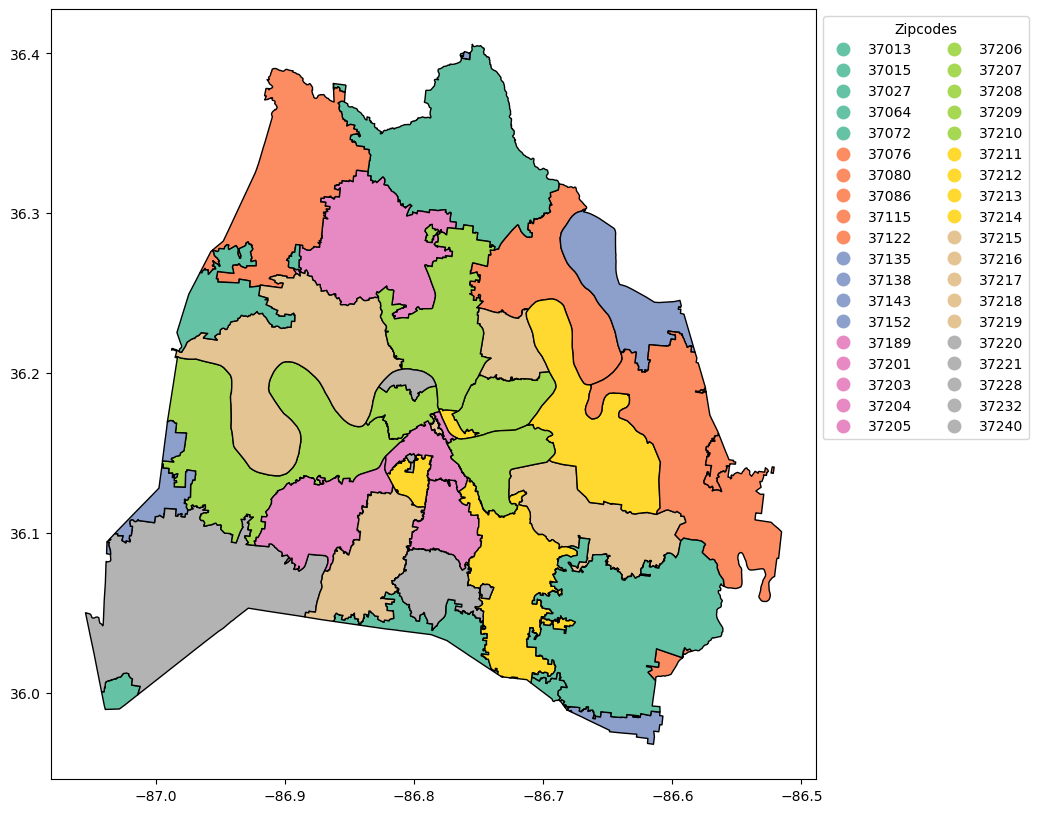

In [204]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1), 'ncol': 2}

zip.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show();

In [4]:
nash_zip = zip.loc[zip['po_name'] == 'NASHVILLE']
nash_zip.reset_index()

,index,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
1,2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
2,7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ..."
3,9,37212,54,NASHVILLE,58759.243654332378,73920091.147705078,"MULTIPOLYGON (((-86.80790 36.14643, -86.80605 ..."
4,12,37209,10,NASHVILLE,310224.91345860378,1001364029.2892456,"MULTIPOLYGON (((-86.97543 36.20877, -86.97221 ..."
5,13,37206,2,NASHVILLE,75782.862116030214,221537063.58166504,"MULTIPOLYGON (((-86.75348 36.16274, -86.75383 ..."
6,17,37217,56,NASHVILLE,179866.56847992647,517579208.08972168,"MULTIPOLYGON (((-86.67355 36.12729, -86.66687 ..."
7,19,37207,49,NASHVILLE,14456.130686344946,6987521.0933837891,"MULTIPOLYGON (((-86.78596 36.29097, -86.78595 ..."
8,24,37219,15,NASHVILLE,21013.192337432083,6579013.4385986328,"MULTIPOLYGON (((-86.78609 36.17465, -86.78585 ..."
9,27,37218,55,NASHVILLE,253501.29953687743,1071962039.8548584,"MULTIPOLYGON (((-86.88231 36.26248, -86.88270 ..."


In [5]:
project = zip.iloc[[0,1,2,7,8,9,12,13,15,17,18,19,22,24,26,27,28,31,32,35,36,37,40,42,44,45,46,47,49,53]]
project.sort_values('zip')

,zip,objectid,po_name,shape_stlength,shape_starea,geometry
26,37072,46,GOODLETTSVILLE,2648.6850248323294,416047.455078125,"MULTIPOLYGON (((-86.76191 36.39867, -86.76200 ..."
15,37072,45,GOODLETTSVILLE,9724.5061842441155,3337338.4436035156,"MULTIPOLYGON (((-86.85290 36.38014, -86.85327 ..."
8,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
46,37076,53,HERMITAGE,291751.42832600401,983805973.83410645,"MULTIPOLYGON (((-86.57085 36.13534, -86.57099 ..."
28,37076,52,HERMITAGE,3786.7098050626546,675823.34777832031,"MULTIPOLYGON (((-86.52159 36.13816, -86.52174 ..."
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
22,37138,51,OLD HICKORY,133803.10728562382,398431173.90905762,"MULTIPOLYGON (((-86.61068 36.24413, -86.61039 ..."
18,37189,50,WHITES CREEK,212443.88846785942,693260660.63964844,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
36,37201,14,NASHVILLE,25670.555742711778,11151362.94934082,"MULTIPOLYGON (((-86.77973 36.17460, -86.77823 ..."
35,37203,33,NASHVILLE,91285.438580354588,120649702.5546875,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."


<Axes: >

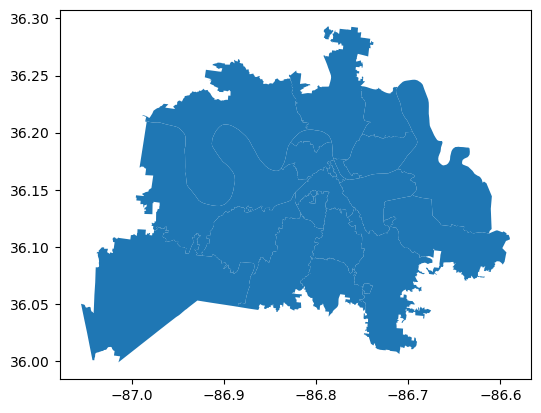

In [6]:
nash_zip.plot()

In [7]:
nash_not = zip.loc[zip['po_name'] != 'NASHVILLE']
nash_not.reset_index()

,index,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
2,4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
3,5,37143,23,PEGRAM,7047.8267580476522,1900364.756652832,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
4,6,37080,42,JOELTON,2319.8074237329579,56522.611450195313,"MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ..."
5,8,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
6,10,37135,7,NOLENSVILLE,69742.56063023665,74707266.403198242,"MULTIPOLYGON (((-86.67188 35.98955, -86.67189 ..."
7,11,37027,31,BRENTWOOD,3116.4327152718852,304596.06201171875,"MULTIPOLYGON (((-86.72012 36.00886, -86.72012 ..."
8,14,37027,30,BRENTWOOD,30401.649619169264,24460979.921020508,"MULTIPOLYGON (((-86.68705 36.01059, -86.68695 ..."
9,15,37072,45,GOODLETTSVILLE,9724.5061842441155,3337338.4436035156,"MULTIPOLYGON (((-86.85290 36.38014, -86.85327 ..."


<Axes: >

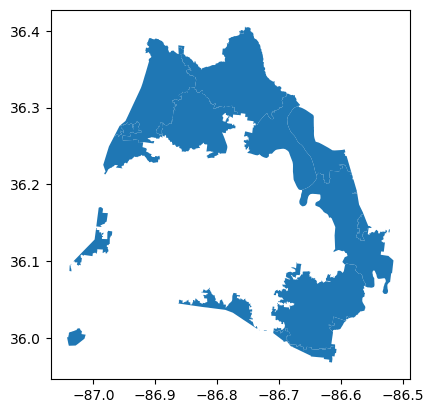

In [8]:
nash_not.plot()

In [9]:
project = project.sort_values('zip')

In [10]:
project = project.reset_index(drop=True)

<Axes: >

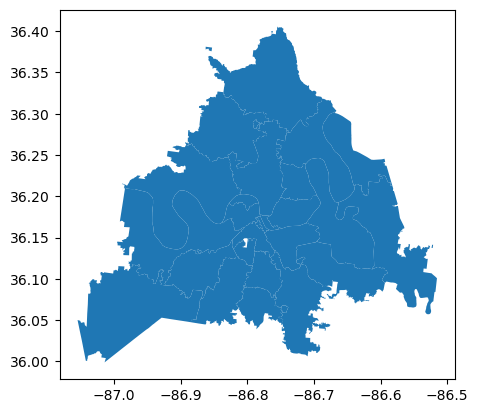

In [11]:
project.plot()


In [335]:
project.to_file('project_zips.geojson')


project.to_file('nashygeo.json')

<Axes: >

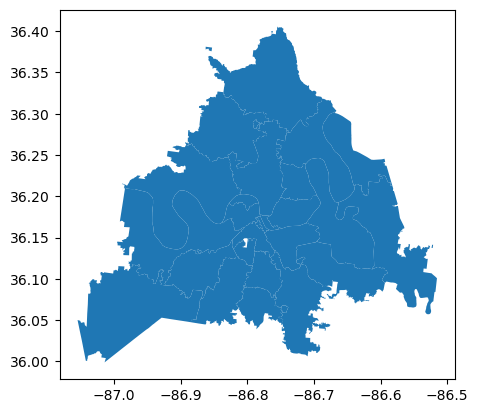

In [13]:
project.plot()

In [30]:
project.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

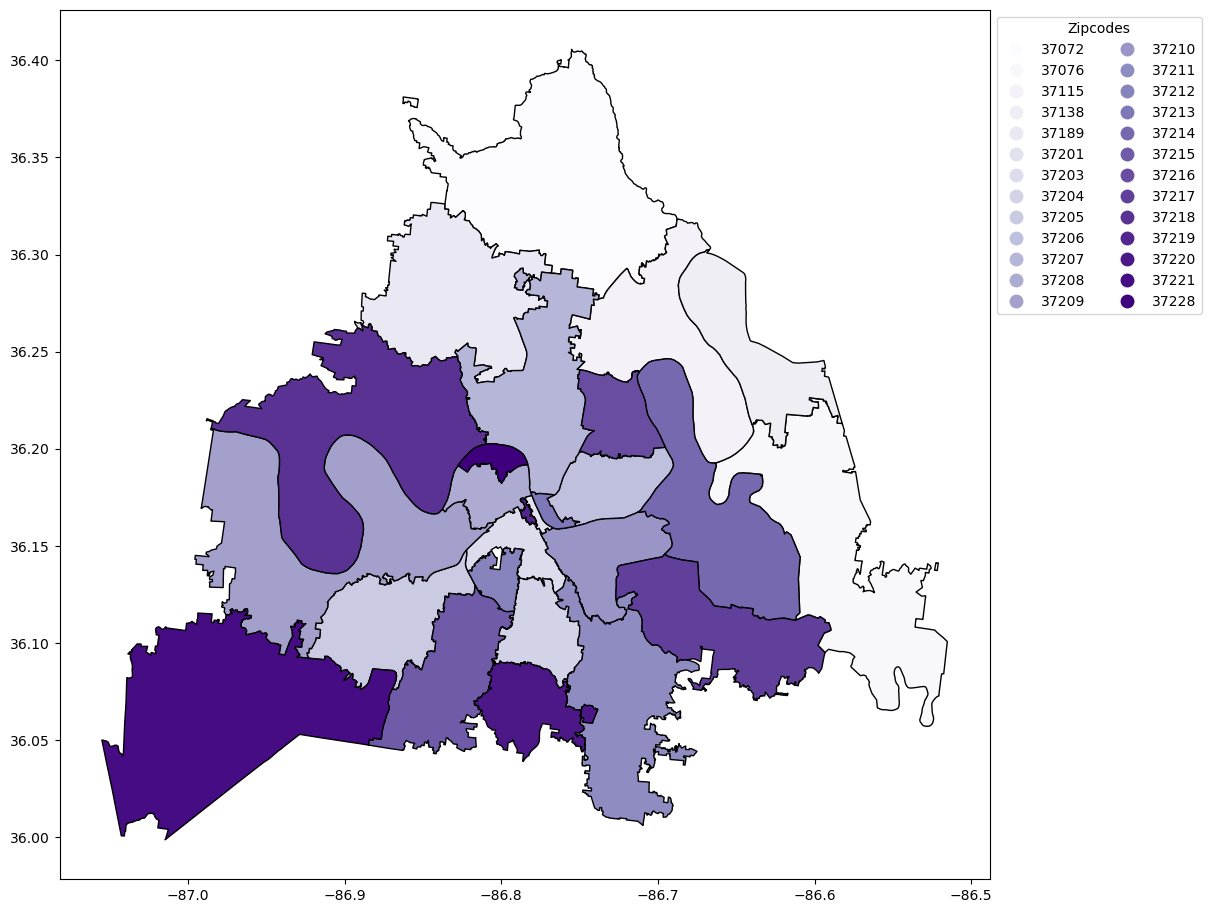

In [302]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1), 'ncol': 2}

project.plot(column = 'zip', figsize=(12, 12),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Purples')
plt.savefig('counties_purple.png')
plt.show();


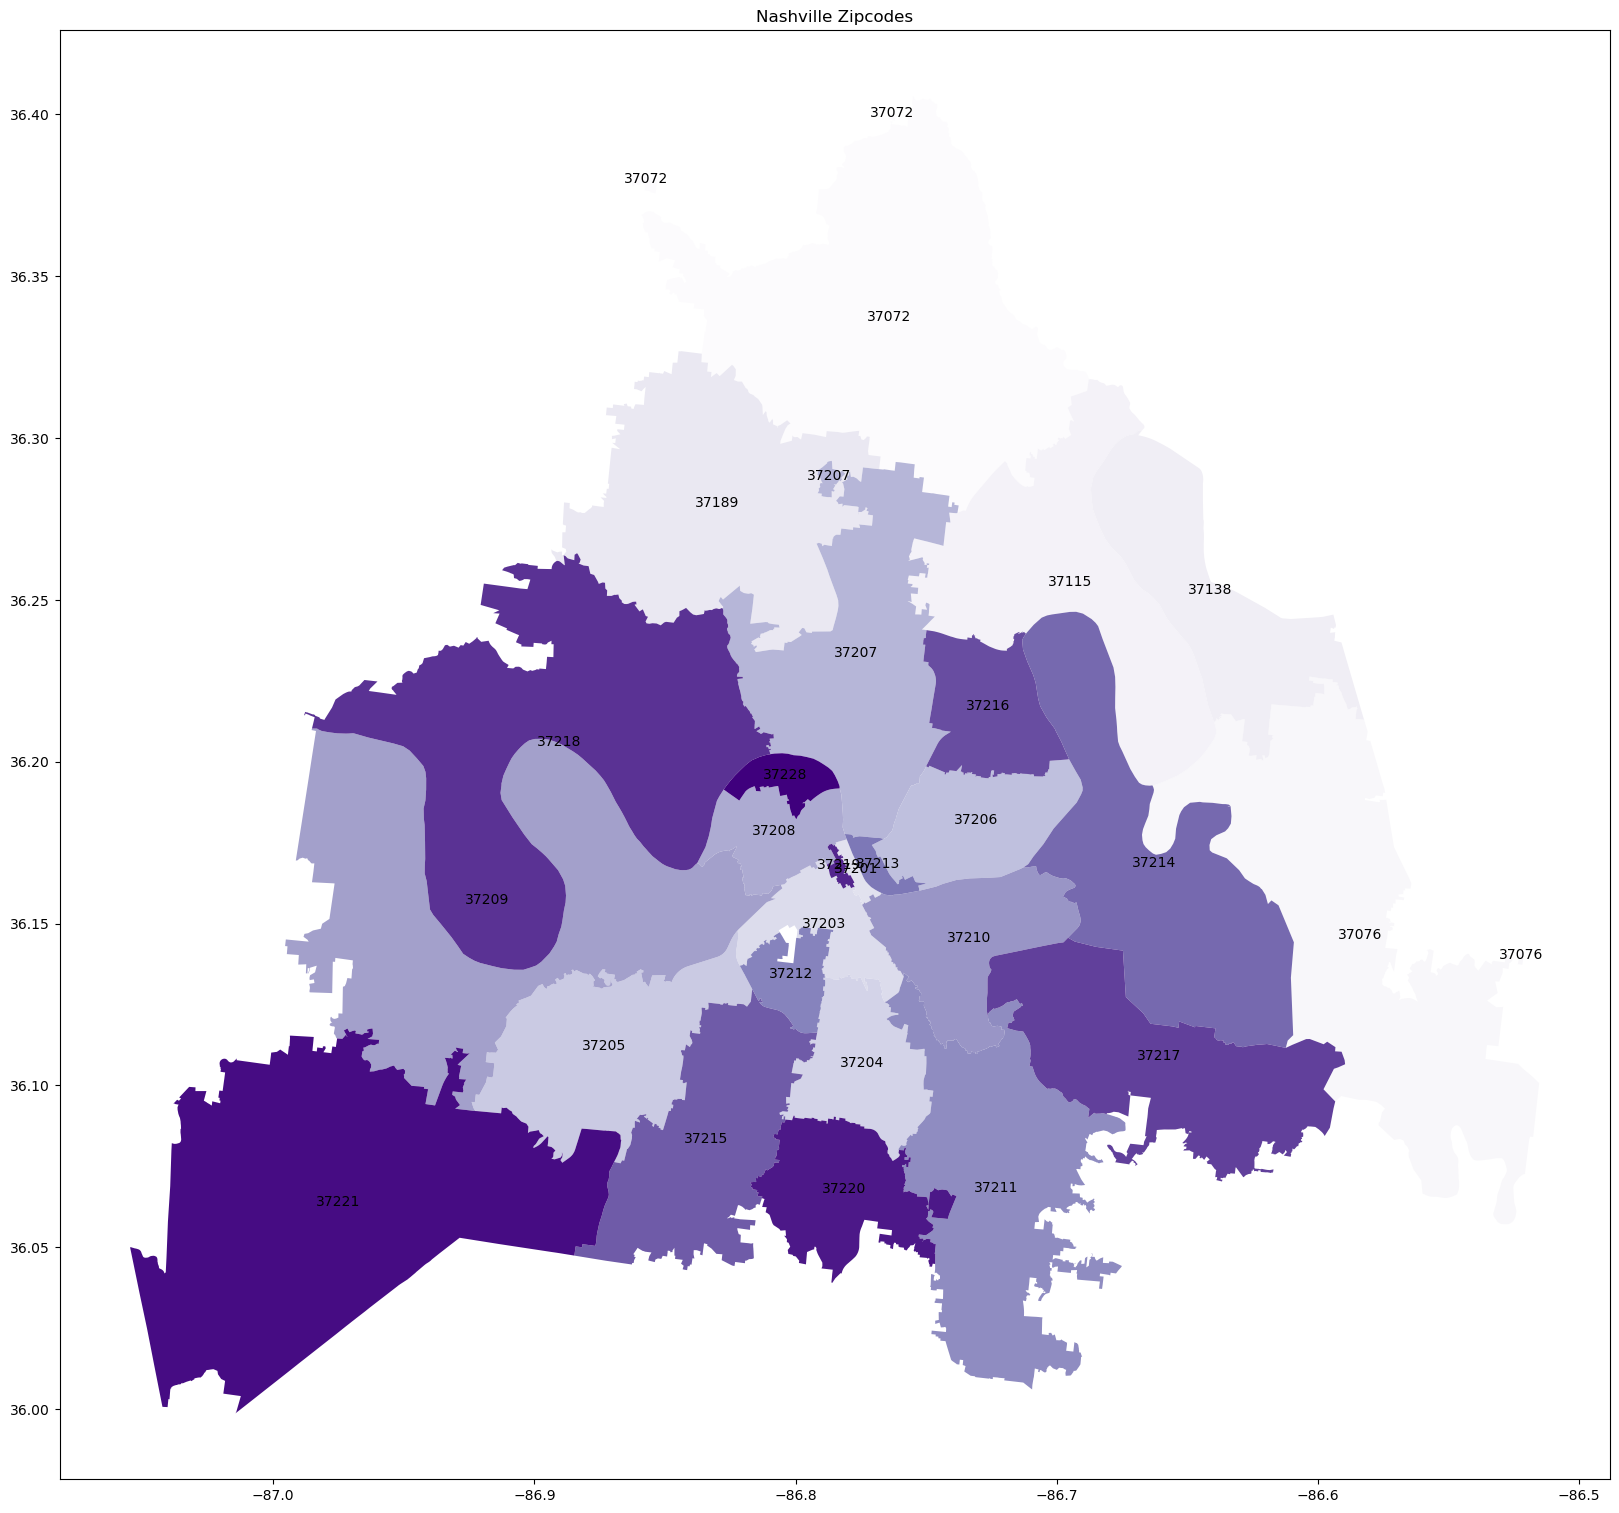

In [313]:
fig, ax = plt.subplots(figsize = (20,20))
project.plot(ax = ax, column = 'zip', cmap = 'Purples')

for index, row in project.iterrows():
    plt.annotate(text=row['zip'], 
                 xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 horizontalalignment='center')
plt.savefig('zips_purple.png')    
plt.title('Nashville Zipcodes');

In [309]:
fireclean = pd.read_csv('fire_clean.csv')
fireclean

,Station Number,Street Address,City,State,ZIP Code,coord
0,Station 4,5111 Harding Place,Nashville,TN,37211,"(36.089971986, -86.687167979)"
1,Station 3,840 Meridian Avenue,Nashville,TN,37207,"(36.186575012, -86.768455006)"
2,Station 7,638 Davidson Road,Nashville,TN,37205,"(36.117906019, -86.88698903)"
3,Station 34,8350 Highway 70 South,Nashville,TN,37221,"(36.092133008, -86.982673987)"
4,Station 33,2501 Forest View Drive,Antioch,TN,37013,"(36.067409998, -86.630679987)"
5,Station 18,1151 East Cahal Avenue,Nashville,TN,37206,"(36.196550986, -86.737414974)"
6,Station 28,2394 Lebanon Road,Nashville,TN,37214,"(36.169457993, -86.682819029)"
7,Station 13,410 45th Avenue North,Nashville,TN,37209,"(36.153039018, -86.840587988)"
8,Station 5,1101 8th Ave S,Nashville,TN,37203,"(36.143323009, -86.779164982)"
9,Station 22,2781 Pennington Bend,Nashville,TN,37214,"(36.21669601, -86.688460972)"


In [183]:
lat = []
lng = []
for coord in fireclean.coord:
    coords = coord.split(',')
    lng.append(float(coords[1][:-1]))
    lat.append(float(coords[0][1:]))

In [184]:
fireclean['lng'] = lng
fireclean['lat'] = lat

In [186]:
firegeo = gpd.GeoDataFrame(fireclean,
                           crs = project.crs,
                           geometry = gpd.points_from_xy(fireclean.lng, fireclean.lat))

<Axes: >

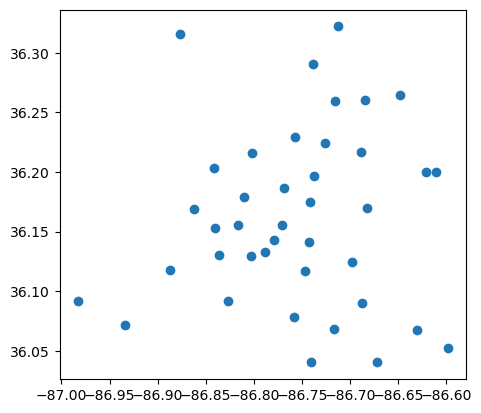

In [187]:
firegeo.plot()

In [48]:
library = pd.read_csv('library_clean.csv')

In [49]:
library = library[['Library Name', 'address', 'city_state_zip', 'coords']]

In [50]:
library.head()


,Library Name,address,city_state_zip,coords
0,East,206 Gallatin Avenue,"Nashville, TN 37206","(36.17912, -86.750438)"
1,Hadley Park,"1039 28th Ave., North","Nashville, TN 37208","(36.166888, -86.820526)"
2,Inglewood,4312 Gallatin Pike,"Nashville, TN 37216","(36.225814, -86.725447)"
3,Richland Park,4711 Charlotte Avenue,"Nashville, TN 37209","(36.152105, -86.84438)"
4,Main,615 Church Street,"Nashville, TN 37219","(36.162414, -86.781895)"


In [103]:
lat = []
lng = []
for coords in library.coords:
    coords = coords.split(',')
    lng.append(float(coords[1][:-1]))
    lat.append(float(coords[0][1:]))

In [107]:
library['lng'] = lng
library['lat'] = lat

In [108]:
librarygeo = gpd.GeoDataFrame(library,
                           crs = project.crs,
                           geometry = gpd.points_from_xy(library.lng, library.lat))

<Axes: >

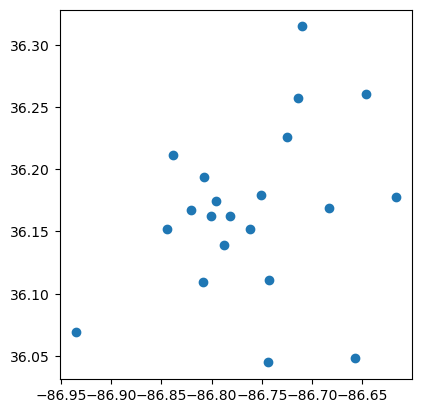

In [109]:
librarygeo.plot()

In [51]:
mss = pd.read_csv('metro_soc_services_clean.csv')

In [117]:
mss = mss[['Organization Name', 'Address', 'City', 'State', 'Zip Code', 'coords']]
mss.head()

,Organization Name,Address,City,State,Zip Code,coords
0,Metro Social Services,930 Industrial Blouvard,Old Hickory,Tennessee,37138,"(36.264344992, -86.658196015)"
1,Metro Social Services,100 Curtis Hollow Road,Antioch,Tennessee,37013,"(36.051782, -86.65031)"
2,Metro Social Services,1310 Coreland Drive,Madison,Tennessee,37115,"(36.244961, -86.717089)"
3,Metro Social Services,600 Woodland St,Nashville,Tennessee,37206,"(36.173412, -86.760625)"
4,Metro Social Services,301 Madison Street,Madison,Tennessee,37115,"(36.25896, -86.717294)"


In [118]:
lat = []
lng = []
for coords in mss.coords:
    coords = coords.split(',')
    lng.append(float(coords[1][:-1]))
    lat.append(float(coords[0][1:]))

In [119]:
mss['lng'] = lng
mss['lat'] = lat

In [122]:
mssgeo = gpd.GeoDataFrame(mss,
                           crs = project.crs,
                           geometry = gpd.points_from_xy(mss.lng, mss.lat))

<Axes: >

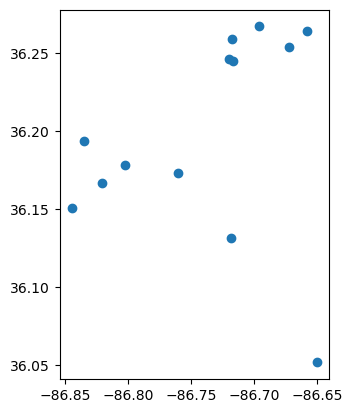

In [123]:
mssgeo.plot()

In [55]:
pharm = pd.read_csv('pharmaceutical_disposal_clean.csv')

In [124]:
pharm = pharm[['Drop-Off Site', 'Street Address', 'zip', 'coords']]
pharm

,Drop-Off Site,Street Address,zip,coords
0,East Precinct,936 East Trinity Lane,37207,"(36.204518, -86.748091)"
1,Hermitage Precinct,3701 James Kay Lane,37076,"(36.177823, -86.615123)"
2,Central Precinct ...,601 Korean Veterans Blvd.,37203,"(36.155688, -86.777522)"
3,West Precinct,5500 Charlotte Pike,37209,"(36.150806, -86.855196)"
4,North Precinct,2231 26th Ave North,37208,"(36.189669, -86.817973)"
5,Midtown Hills Precinct,1443 12th Ave. South,37203,"(36.136965, -86.788375)"
6,Madison Precinct,400 Myatt Drive,37115,"(36.272475, -86.68954)"
7,South Precinct,5101 Harding Place,37211,"(36.08991, -86.688058)"


In [125]:
lat = []
lng = []
for coords in pharm.coords:
    coords = coords.split(',')
    lng.append(float(coords[1][:-1]))
    lat.append(float(coords[0][1:]))

In [126]:
pharm['lng'] = lng
pharm['lat'] = lat

In [127]:
pharmgeo = gpd.GeoDataFrame(pharm,
                           crs = project.crs,
                           geometry = gpd.points_from_xy(pharm.lng, pharm.lat))

<Axes: >

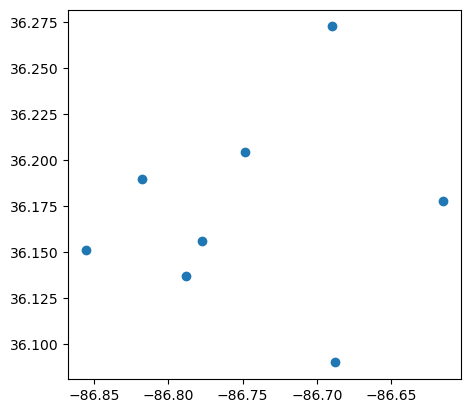

In [128]:
pharmgeo.plot()

In [59]:
health = pd.read_csv('public_health_clinics_clean.csv')

(4, 6)


,Clinic Name,Phone,Hours,address,city,coords
0,East Public Health Center,(615) 862-7916,Monday - Friday 7:30 am until 4:30 pm,1015 East Trinity Lane,"Nashville, TN","(36.204273, -86.745286)"


In [129]:
health = health[['Clinic Name', 'address', 'city', 'coords']]
health

,Clinic Name,address,city,coords
0,East Public Health Center,1015 East Trinity Lane,"Nashville, TN","(36.204273, -86.745286)"
1,Woodbine Public Health Center,224 Oriel Avenue,"Nashville, TN","(36.122097, -86.743627)"
2,Lentz Public Health Center,2500 Charlotte Avenue,"Nashville, TN","(36.155043, -86.812991)"
3,South Nashville WIC Nutrition Center (WIC Only),3718 Nolensville Pike,"Nashville, TN","(36.093667, -86.736409)"


In [130]:
lat = []
lng = []
for coords in health.coords:
    coords = coords.split(',')
    lng.append(float(coords[1][:-1]))
    lat.append(float(coords[0][1:]))

In [131]:
health['lng'] = lng
health['lat'] = lat

In [132]:
healthgeo = gpd.GeoDataFrame(health,
                           crs = project.crs,
                           geometry = gpd.points_from_xy(health.lng, health.lat))

<Axes: >

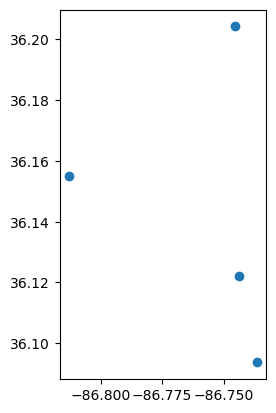

In [133]:
healthgeo.plot()

In [33]:
safety = pd.read_csv('public_safety_locations_clean.csv')
print(safety.shape)
safety.head(1)

(48, 9)


,Resource Name/Number,Resource Type,Street Address,City,State,Zip Code,address,city,coords
0,Station 12,Fire Station,101 Polk Avenue,Nashville,TN,37210,101 Polk Avenue,"Nashville, TN 37210","(36.141361, -86.742942)"


In [66]:
safety = safety[['Resource Name/Number', 'Resource Type', 'Street Address', 'City',
       'State', 'Zip Code', 'coords']]
safety

,Resource Name/Number,Resource Type,Street Address,City,State,Zip Code,coords
0,Station 12,Fire Station,101 Polk Avenue,Nashville,TN,37210,"(36.141361, -86.742942)"
1,Station 8,Fire Station,2010 12th Avenue South,Nashville,TN,37212,"(36.133044, -86.78875)"
2,Station 19,Fire Station,349 21st Avenue North,Nashville,TN,37203,"(36.156509, -86.806429)"
3,Station 10,Fire Station,15530 Old Hickory Blvd.,Nashville,TN,37211,"(36.039834, -86.740496)"
4,Station 36,Fire Station,1000 Donelson Street,Old Hickory,TN,37138,"(36.264093, -86.648087)"
5,Station 21,Fire Station,320 Joyner Avenue,Nashville,TN,37211,"(36.116466, -86.747067)"
6,Station 32,Fire Station,4031 Plantation Drive,Hermitage,TN,37076,"(36.20044, -86.621467)"
7,Station 20,Fire Station,1626 Harding Place,Nashville,TN,37215,"(36.0911, -86.82559)"
8,Station 39,Fire Station,1247 South Dickerson Road,Goodlettsville,TN,37072,"(36.290544, -86.738286)"
9,Station 13,Fire Station,410 45th Avenue North,Nashville,TN,37209,"(36.153027, -86.840928)"


fire = safety.loc[safety['Resource Type'] == 'Fire Station']
fire

fire.dtypes

lat = []
lng = []
for coords in fire.coords:
    coords = coords.split(',')
    lng.append(float(coords[1][:-1]))
    lat.append(float(coords[0][1:]))

fire['lng'] = lng
fire['lat'] = lat

firegeo = gpd.GeoDataFrame(fire,
                           crs = project.crs,
                           geometry = gpd.points_from_xy(fire.lng, fire.lat))

firegeo.plot()

In [142]:
police = safety.loc[safety['Resource Type'] == 'Police Precinct']
police

,Resource Name/Number,Resource Type,Street Address,City,State,Zip Code,coords
24,Midtown Hills Precinct,Police Precinct,1441 12th Avenue South,Nashville,TN,37203,"(36.137312, -86.788264)"
27,Madison Precinct,Police Precinct,400 Myatt Dr.,Madison,TN,37115,"(36.272475, -86.68954)"
30,Hermitage Precinct,Police Precinct,3701 James Kay Lane,Hermitage,TN,37076,"(36.177823, -86.615122)"
32,West Precinct,Police Precinct,5500 Charlotte Pike,Nashville,TN,37209,"(36.150829, -86.855095)"
37,North Precinct,Police Precinct,2231 26th Ave. North,Nashville,TN,37208,"(36.189673, -86.817971)"
43,Central Precinct,Police Precinct,601 Korean Veterans Blvd.,Nashville,TN,37203,"(36.15567, -86.777558)"
46,East Precinct,Police Precinct,936 E. Trinity Lane,Nashville,TN,37207,"(36.204513, -86.748032)"
47,South Precinct,Police Precinct,5101 Harding Place,Nashville,TN,37211,"(36.089618, -86.688491)"


In [143]:
lat = []
lng = []
for coords in police.coords:
    coords = coords.split(',')
    lng.append(float(coords[1][:-1]))
    lat.append(float(coords[0][1:]))

In [145]:
police['lng'] = lng
police['lat'] = lat

C:\Users\rylii-lillith\AppData\Local\Temp\ipykernel_8380\3393570545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police['lng'] = lng
C:\Users\rylii-lillith\AppData\Local\Temp\ipykernel_8380\3393570545.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  police['lat'] = lat


In [146]:
policegeo = gpd.GeoDataFrame(police,
                           crs = project.crs,
                           geometry = gpd.points_from_xy(police.lng, police.lat))

<Axes: >

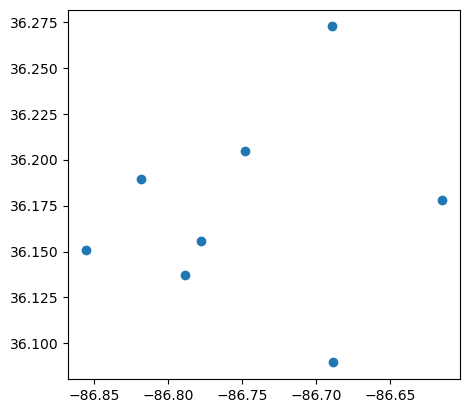

In [147]:
policegeo.plot()

In [115]:
wifi = pd.read_csv('wifi_clean.csv')

In [148]:
wifi = wifi[['Site Name', 'Site Type', 'Street Address', 'City', 'State', 'ZIP', 'coodrs']]
wifi

,Site Name,Site Type,Street Address,City,State,ZIP,coodrs
0,Andrew Jackson Courts,Public Gathering,1457 Jackson Street,Nashville,TN,37208,"(36.167733, -86.800501)"
1,Antioch Community Center,Regional Community Center,5023 Blue Hole Road,Antioch,TN,37013,"(36.055271, -86.672392)"
2,Azafran Park,Public Gathering,2187 Nolensville Pike,Nashville,TN,37211,"(36.127313, -86.753363)"
3,Beaman Nature Center,Regional Community Center,5911 Old Hickory Blvd,Nashville,TN,37015,"(36.260013, -86.893379)"
4,Bellevue Community Center,Regional Community Center,656 Colice Jeanne Road,Nashville,TN,37221,"(36.072144, -86.934617)"
...,...,...,...,...,...,...,...
98,Watkins Library,Library,612 17th Avenue North,Nashville,TN,37203,"(36.16275, -86.80084)"
99,West Community Center,Regional Community Center,6105 Morrow Road,Nashville,TN,37209,"(36.163446, -86.863055)"
100,West Police Precinct - Community Room,Public Gathering,5500 Charlotte Pike,Nashville,TN,37209,"(36.150829, -86.855095)"
101,West Riverfront Park,Public Gathering,310 1st Ave South,Nashville,TN,37201,"(36.159153, -86.772422)"


In [150]:
lat = []
lng = []
for coodrs in wifi.coodrs:
    coodrs = coodrs.split(',')
    lng.append(float(coodrs[1][:-1]))
    lat.append(float(coodrs[0][1:]))

In [151]:
wifi['lng'] = lng
wifi['lat'] = lat

In [152]:
wifigeo = gpd.GeoDataFrame(wifi,
                           crs = project.crs,
                           geometry = gpd.points_from_xy(wifi.lng, wifi.lat))

<Axes: >

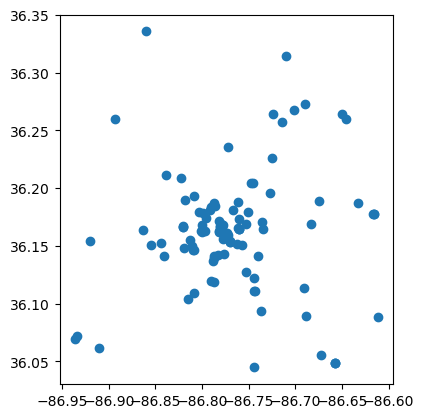

In [153]:
wifigeo.plot()

water = pd.read_csv('../data/WaterFountains_HydrationSystems.csv')
water

water = water[['the_geom', 'NAME', 'LAT', 'LON', 'Location', 'ADA']]
water

watergeo = gpd.GeoDataFrame(water,
                           crs = project.crs,
                           geometry = gpd.points_from_xy(water.LON, water.LAT))

watergeo.plot()

In [220]:
watergeo = gpd.read_file('../data/publicwater.geojson')
watergeo

,name,location,dog,objectid,lon,ada,cnt,lat,feat_type,geometry
0,Beaman Water Fountain,None,Y,45921,36.26250456,Y,1,-86.89425346,Fountain/Bottle filler/ADA,POINT (-86.89425 36.26250)
1,Edwin Nature Center Water Fountain,Restrooms Breezeway,N,45937,36.06089915,Y,1,-86.90622747,Bottle Filler/ADA,POINT (-86.90623 36.06090)
2,Percy Warner Belle Meade Gates Water Fountain,Belle Meade Gates,Y,45964,36.08310102,Y,1,-86.86727566,ADA Bowl,POINT (-86.86728 36.08310)
3,West Park Water Fountain,Ballfield,N,45992,36.16179583,N,1,-86.86378994,Single with foot pedal,POINT (-86.86379 36.16180)
4,Richland Park Water Fountain,Playground,N,46012,36.15139384,N,1,-86.84589094,Single with foot pedal,POINT (-86.84589 36.15139)
...,...,...,...,...,...,...,...,...,...,...
68,Harpeth River Greenway,Morton Mill Rd at Old Harding Pike,Y,0,36.05899273,N,1,-86.94508441,Standard/ADA/Bottle Filler,POINT (-86.94508 36.05899)
69,Harpeth River Greenway,Butler Field Trail Head,Y,0,36.05133033,N,1,-86.91617134,Standard/ADA/Bottle Filler,POINT (-86.91617 36.05133)
70,River Landing,Greenway @ Victory & Titans Ways,N,0,36.16412161,Y,1,-86.77223047,Standard/ADA,POINT (-86.77223 36.16412)
71,Ascend Amphiteater Water Fountain,Building,N,0,36.16014227,N,1,-86.77120998,Standard/ADA/Bottle Filler,POINT (-86.77121 36.16014)


<Axes: >

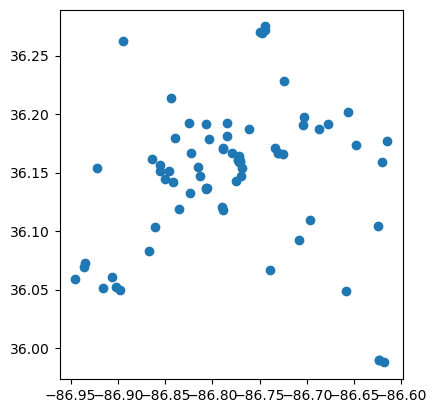

In [200]:
watergeo.plot()

fireclean
library
mss
pharm
health
police
wifi
water

firegeo
librarygeo
mssgeo
pharmgeo
healthgeo
policegeo
wifigeo
watergeo

In [336]:
heat = gpd.read_file('heatmaptable.geojson')

In [314]:
wifi_by_zip = gpd.sjoin(wifigeo, project)

In [337]:
wifi_heat = gpd.sjoin(heat, wifigeo)

In [349]:
heat.head(20)

,zip,objectid,po_name,shape_stlength,shape_starea,Zipcode,score,Population 16 years and over,Employed,Unemployed,Median household income (dollars),Mean household income (dollars),geometry
0,37072,47,GOODLETTSVILLE,225242.45424953851,1094968706.7701416,37072,15,26286,16322,918,72370,94674,"MULTIPOLYGON (((-86.75361 36.40428, -86.75354 ..."
1,37076,52,HERMITAGE,3786.7098050626546,675823.34777832031,37076,25,31301,21257,805,68894,87509,"MULTIPOLYGON (((-86.52159 36.13816, -86.52174 ..."
2,37115,1,MADISON,178783.02488886821,596553400.57885742,37115,30,33647,21552,1438,55313,69650,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
3,37138,51,OLD HICKORY,133803.10728562382,398431173.90905762,37138,20,19096,12334,234,87465,112166,"MULTIPOLYGON (((-86.61068 36.24413, -86.61039 ..."
4,37189,50,WHITES CREEK,212443.88846785942,693260660.63964844,37189,0,3338,2324,123,88804,108107,"MULTIPOLYGON (((-86.84400 36.32689, -86.83591 ..."
5,37201,14,NASHVILLE,25670.555742711778,11151362.94934082,37201,5,1443,971,0,106460,137564,"MULTIPOLYGON (((-86.77973 36.17460, -86.77823 ..."
6,37203,33,NASHVILLE,91285.438580354588,120649702.5546875,37203,25,17629,12873,431,63834,94336,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."
7,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,37204,10,14195,10803,196,104987,178418,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
8,37205,16,NASHVILLE,146801.80831498865,400978073.00933838,37205,5,21762,13463,238,136100,222323,"MULTIPOLYGON (((-86.81907 36.13351, -86.81688 ..."
9,37206,2,NASHVILLE,75782.862116030214,221537063.58166504,37206,20,23490,17719,898,80915,114377,"MULTIPOLYGON (((-86.75348 36.16274, -86.75383 ..."


In [324]:
water_by_zip = gpd.sjoin(watergeo, project)

In [333]:
wifi_count = wifi_by_zip.ZIP.value_counts().to_frame()
wifi_count.to_csv('wifi_count.csv')

In [334]:
water_count = water_by_zip.zip.value_counts().to_frame()
water_count.to_csv('water_count.csv')

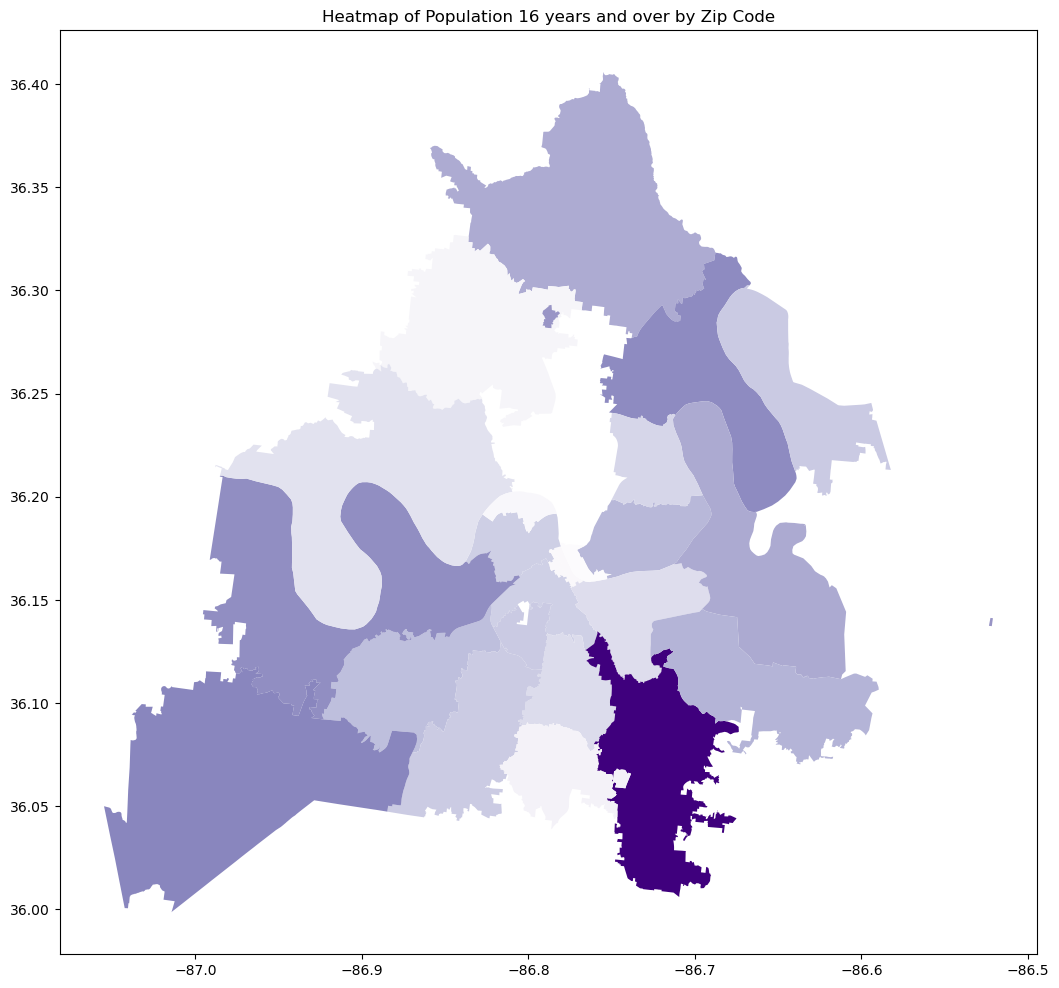

In [352]:
fig, ax = plt.subplots(1, 1, figsize=(20, 12))
heat.plot(column='Population 16 years and over', cmap='Purples', linewidth=0.8, ax=ax)
ax.set_title('Heatmap of Population 16 years and over by Zip Code')
plt.savefig('pop_heat_purp.png')
plt.show()

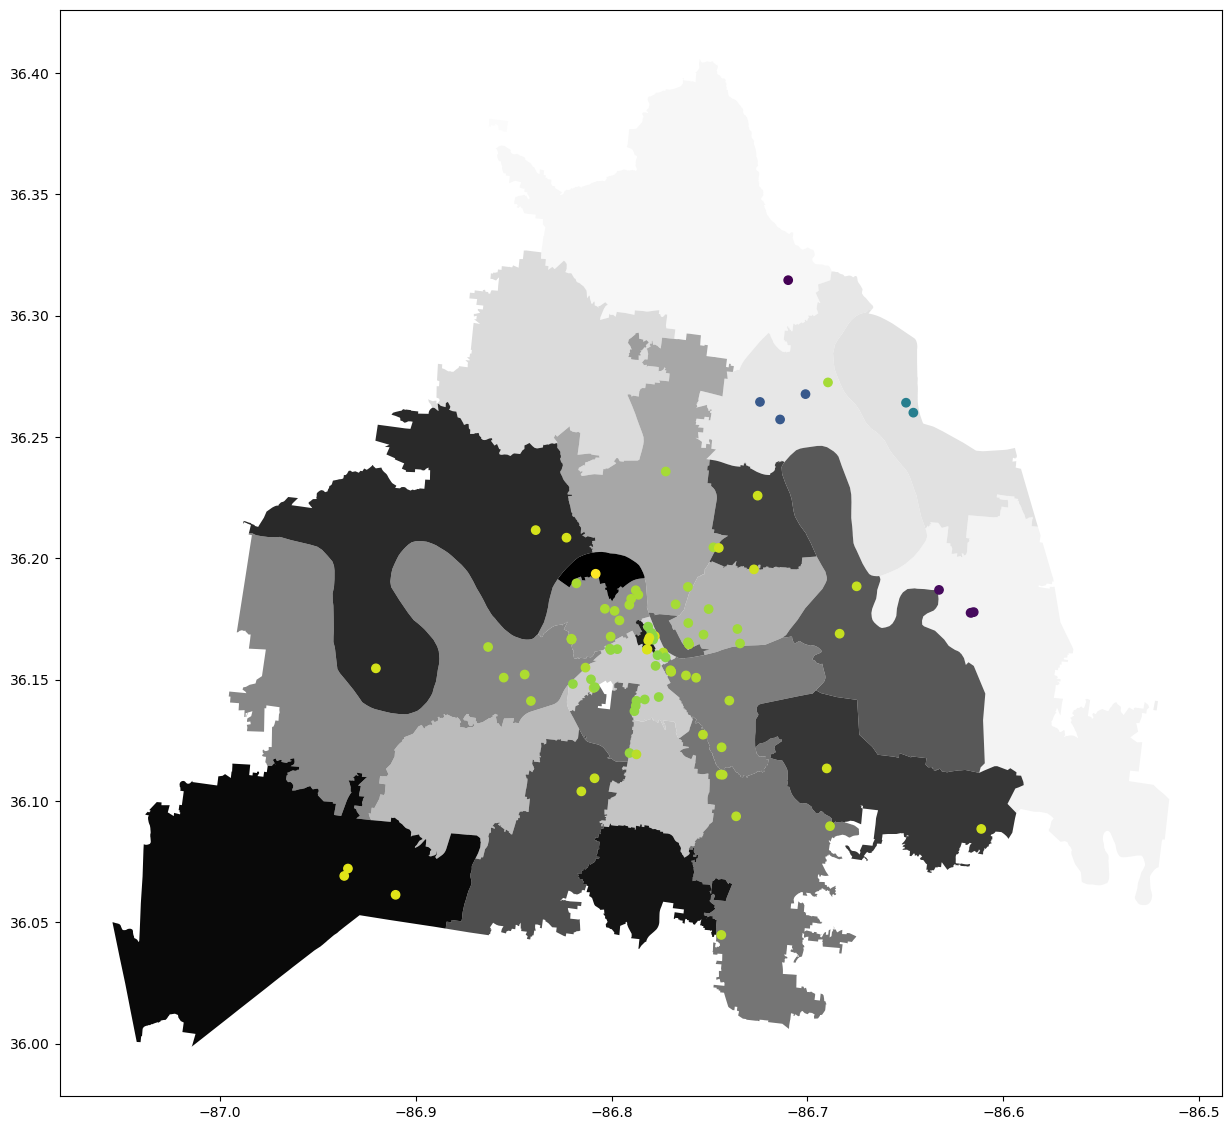

In [344]:
ax = project.plot(figsize = (15, 15), cmap = 'Greys')
wifi_by_zip.plot( ax = ax, column = 'ZIP')
plt.savefig('wifi_Greys.png')
plt.show();

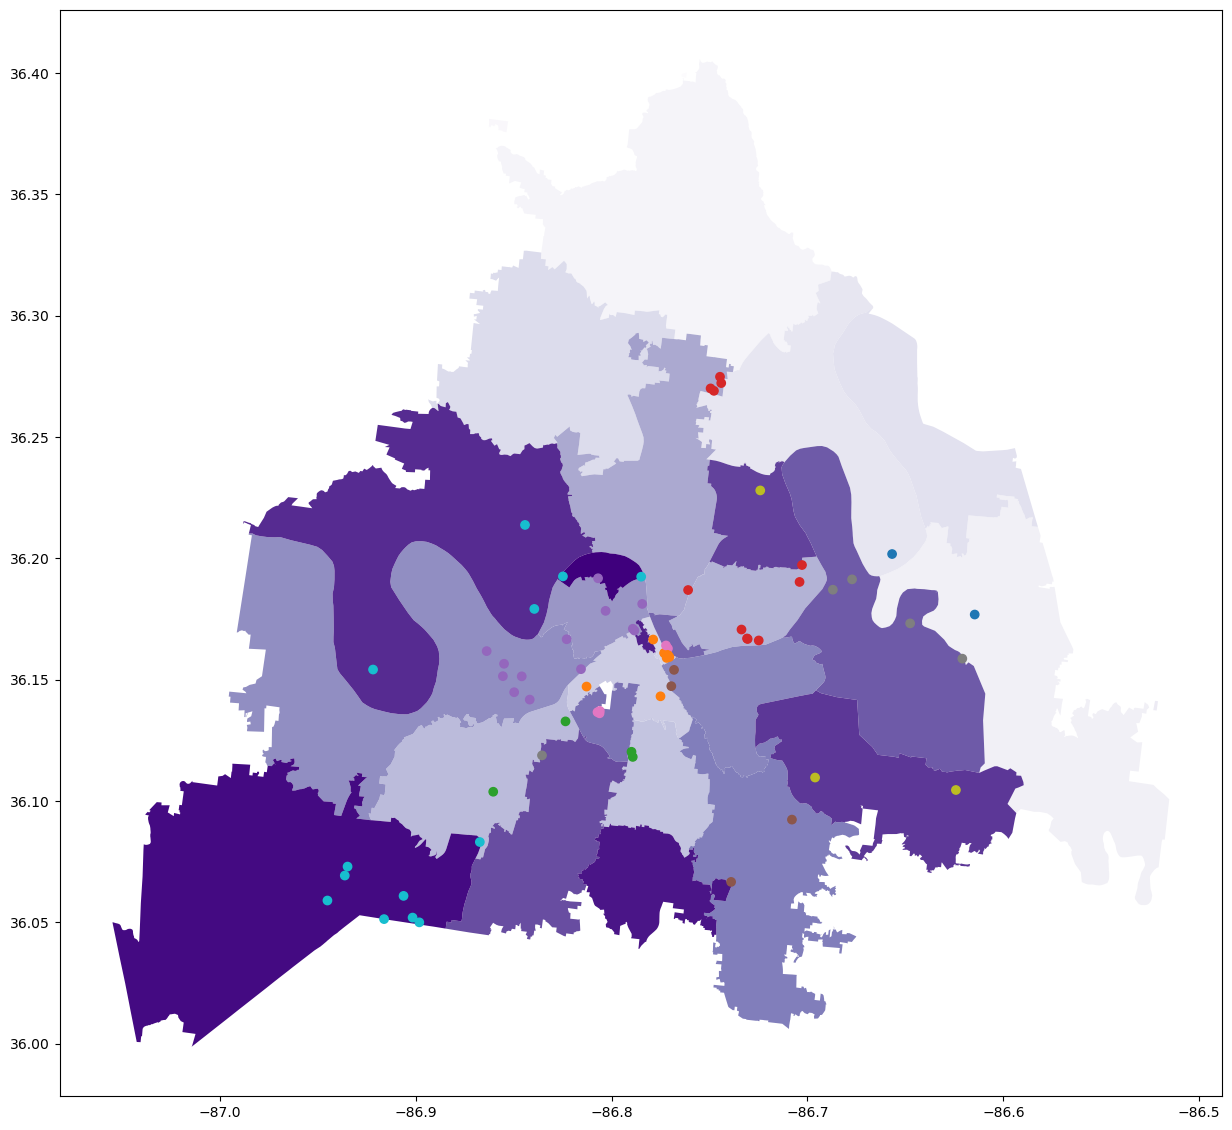

In [328]:
ax = project.plot(figsize = (15, 15), cmap = 'Purples')
water_by_zip.plot( ax = ax, column = 'zip')
plt.savefig('water_purple.png')
plt.show();

In [299]:
fire_vc = fireclean['ZIP Code'].value_counts()
fire_vc.to_frame()

,count
ZIP Code,
37211,4
37013,3
37207,3
37203,2
37076,2
37072,2
37212,2
37115,2
37210,2


In [237]:
library['zip'] = library['city_state_zip'].str[-6:]

In [241]:
library['zip'] = library['zip'].replace('370706', '37076')

In [254]:
library['zip'] = library['zip'].replace(' ', '')

In [298]:
library_vc = library['zip'].value_counts()
library_vc.to_frame()

,count
zip,
37203,2
37211,2
37208,2
37206,1
37138,1
37214,1
37210,1
37072,1
37076,1


In [297]:
mss_vc = mss['Zip Code'].value_counts()
mss_vc.to_frame()

,count
Zip Code,
37115,5
37208,2
37138,1
37013,1
37206,1
37210,1
37209,1
37218,1


In [296]:
pharm_vc = pharm['zip'].value_counts()
pharm_vc.to_frame()

,count
zip,
37203,2
37207,1
37076,1
37209,1
37208,1
37115,1
37211,1


In [300]:
health

,Clinic Name,address,city,coords,lng,lat
0,East Public Health Center,1015 East Trinity Lane,"Nashville, TN","(36.204273, -86.745286)",-86.745286,36.204273
1,Woodbine Public Health Center,224 Oriel Avenue,"Nashville, TN","(36.122097, -86.743627)",-86.743627,36.122097
2,Lentz Public Health Center,2500 Charlotte Avenue,"Nashville, TN","(36.155043, -86.812991)",-86.812991,36.155043
3,South Nashville WIC Nutrition Center (WIC Only),3718 Nolensville Pike,"Nashville, TN","(36.093667, -86.736409)",-86.736409,36.093667


In [295]:
police_vc = police['Zip Code'].value_counts()
police_vc.to_frame()

,count
Zip Code,
37203,2
37115,1
37076,1
37209,1
37208,1
37207,1
37211,1


In [294]:
wifi_vc = wifi['ZIP'].value_counts()
wifi_vc.to_frame()

,count
ZIP,
37208,13
37203,12
37210,8
37206,8
37201,6
37209,6
37211,6
37219,5
37207,5


In [221]:
waterg.columns

Index(['name', 'location', 'dog', 'objectid', 'lon', 'ada', 'cnt', 'lat',
       'feat_type', 'geometry'],
      dtype='object')

In [279]:
pharmf = pharm['zip'].value_counts().to_frame()
pharmf

,count
zip,
37203,2
37207,1
37076,1
37209,1
37208,1
37115,1
37211,1


In [277]:
mssf = mss['Zip Code'].value_counts().to_frame()
mssf

,count
Zip Code,
37115,5
37208,2
37138,1
37013,1
37206,1
37210,1
37209,1
37218,1


,count
37013,NaN
37076,NaN
37115,6.0
37138,NaN
37203,NaN
37206,NaN
37207,NaN
37208,3.0
37209,2.0
37210,NaN
